In [40]:
# CT4101 Assignment 2 - Steel Regression

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler


In [42]:
df = pd.read_csv("data/steel.csv")
df.head()

df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   normalising_temperature  553 non-null    float64
 1   tempering_temperature    553 non-null    int64  
 2   percent_silicon          553 non-null    float64
 3   percent_chromium         553 non-null    float64
 4   percent_copper           553 non-null    float64
 5   percent_nickel           553 non-null    float64
 6   percent_sulphur          553 non-null    float64
 7   percent_carbon           553 non-null    float64
 8   percent_manganese        553 non-null    float64
 9   tensile_strength         553 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 43.3 KB


,normalising_temperature,tempering_temperature,percent_silicon,percent_chromium,percent_copper,percent_nickel,percent_sulphur,percent_carbon,percent_manganese,tensile_strength
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,478.205222,752.124774,0.063890,1.277492,0.784018,0.972592,0.059302,1.817157,0.577192,192.048148
std,162.317845,259.220817,0.080655,0.260280,0.068589,0.074270,0.055396,0.185422,0.623316,91.134383
min,178.500000,225.000000,0.000000,0.745783,0.594000,0.801000,0.000000,1.378000,0.000000,12.824943
25%,382.987500,550.000000,0.000000,1.065888,0.753450,0.932000,0.000000,1.680800,0.000000,126.201687
50%,465.850000,900.000000,0.000000,1.286314,0.784000,0.968000,0.061000,1.857000,0.244600,182.556353
75%,570.500000,900.000000,0.129800,1.492220,0.830000,1.028100,0.101000,1.920000,1.175400,245.501719
max,945.000000,950.000000,0.359400,1.794173,0.945000,1.125000,0.322000,2.470000,1.950000,454.295736


In [43]:
df.isnull().sum()

normalising_temperature    0
tempering_temperature      0
percent_silicon            0
percent_chromium           0
percent_copper             0
percent_nickel             0
percent_sulphur            0
percent_carbon             0
percent_manganese          0
tensile_strength           0
dtype: int64

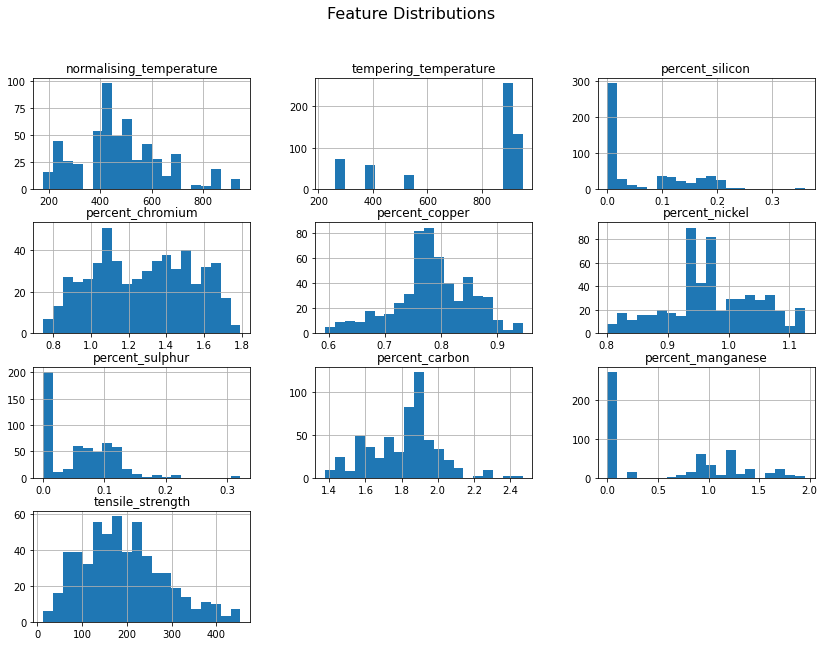

In [44]:
df.hist(figsize=(14, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.savefig("results/Feature Distributions.png", dpi=300, bbox_inches="tight")
plt.show()


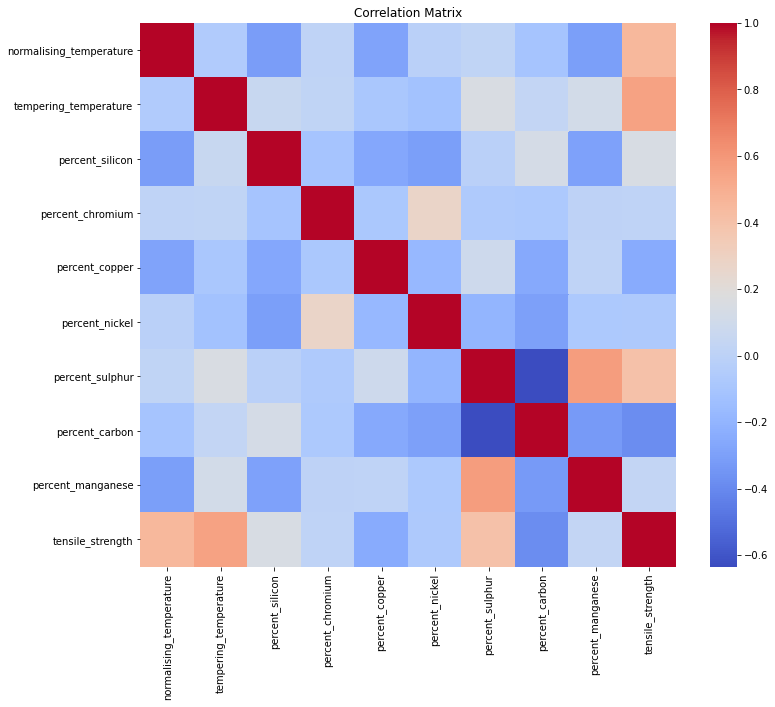

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("results/Correlation Matrix.png", dpi=300, bbox_inches="tight")
plt.show()


In [46]:
from sklearn.preprocessing import StandardScaler

#separating features and target
scaler = StandardScaler()
X = df.drop("tensile_strength", axis=1)
y = df["tensile_strength"]

#scale features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [47]:
from sklearn.model_selection import KFold, cross_validate

cv = KFold(n_splits=10, shuffle=True, random_state=42)



In [48]:
# scoring = {
#     "rmse": "neg_root_mean_squared_error",
#     "mae": "neg_mean_absolute_error",
# }


In [49]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

dt_reg = DecisionTreeRegressor(random_state=42)

dt_cv = cross_validate(
    dt_reg,
    X,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=True
)

dt_train_rmse = -dt_cv["train_rmse"]
dt_test_rmse  = -dt_cv["test_rmse"]
dt_train_mae  = -dt_cv["train_mae"]
dt_test_mae   = -dt_cv["test_mae"]

print("Decision Tree - RMSE (train):", dt_train_rmse.mean(), "+/-", dt_train_rmse.std())
print("Decision Tree - RMSE (test): ", dt_test_rmse.mean(),  "+/-", dt_test_rmse.std())
print("Decision Tree - MAE (train):", dt_train_mae.mean(),  "+/-", dt_train_mae.std())
print("Decision Tree - MAE (test): ", dt_test_mae.mean(),   "+/-", dt_test_mae.std())


Decision Tree - RMSE (train): 1.7652056078443961e-15 +/- 2.1619268565353e-15
Decision Tree - RMSE (test):  40.6944843021363 +/- 4.619579464598501
Decision Tree - MAE (train): 1.3704099308398239e-16 +/- 1.6784035951363426e-16
Decision Tree - MAE (test):  26.49284997534026 +/- 3.4776992199003316


In [50]:
#Decision Tree
dt_param_grid = {
    "max_depth": [None, 3, 5, 7, 10, 15],
    "min_samples_split": [2, 5, 10, 20]
}


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)

dt_param_grid = {
    "max_depth": [None, 3, 5, 7, 10, 15],
    "min_samples_split": [2, 5, 10, 20]
}


In [52]:
dt_grid = GridSearchCV(
    estimator=dt_reg,
    param_grid=dt_param_grid,
    cv=cv,  #(n_splits=10, shuffle=True, random_state=42)
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    return_train_score=True
)

dt_grid.fit(X, y)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 10, 20]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [53]:
print("Best params:", dt_grid.best_params_)
print("Best RMSE:", -dt_grid.best_score_)

Best params: {'max_depth': None, 'min_samples_split': 5}
Best RMSE: 38.72109932580556


In [54]:
with open("results/dt_best_params.txt", "w") as f:
    f.write(str(dt_grid.best_params_))
    f.write("\nBest RMSE: " + str(-dt_grid.best_score_))


In [55]:
dt_best = dt_grid.best_estimator_

dt_best_cv = cross_validate(
    dt_best,
    X,
    y,
    cv=cv,
    scoring=scoring,          
    return_train_score=True
)

dt_best_train_rmse = -dt_best_cv["train_rmse"]
dt_best_test_rmse  = -dt_best_cv["test_rmse"]
dt_best_train_mae  = -dt_best_cv["train_mae"]
dt_best_test_mae   = -dt_best_cv["test_mae"]

print("Tuned DT - RMSE (train):", dt_best_train_rmse.mean(), "+/-", dt_best_train_rmse.std())
print("Tuned DT - RMSE (test): ", dt_best_test_rmse.mean(),  "+/-", dt_best_test_rmse.std())
print("Tuned DT - MAE (train):", dt_best_train_mae.mean(),  "+/-", dt_best_train_mae.std())
print("Tuned DT - MAE (test): ", dt_best_test_mae.mean(),   "+/-", dt_best_test_mae.std())


Tuned DT - RMSE (train): 10.425616395581557 +/- 0.5969001155589506
Tuned DT - RMSE (test):  38.72109932580556 +/- 4.0065718441319875
Tuned DT - MAE (train): 6.560482696524763 +/- 0.4054038719563651
Tuned DT - MAE (test):  26.90614845278601 +/- 2.813937620615519


In [56]:
dt_param_grid_refined = {
    "max_depth": [3, 5, 7, 10, 12, 15, 20],
    "min_samples_split": [2, 5, 10]
}

dt_grid_refined = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=dt_param_grid_refined,
    cv=cv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    return_train_score=True
)

dt_grid_refined.fit(X, y)

print("Best refined params:", dt_grid_refined.best_params_)
print("Best refined CV RMSE:", -dt_grid_refined.best_score_)


Best refined params: {'max_depth': 12, 'min_samples_split': 5}
Best refined CV RMSE: 38.492765219909835


In [57]:
dt_best_refined = dt_grid_refined.best_estimator_

dt_best_refined_cv = cross_validate(
    dt_best_refined,
    X,
    y,
    cv=cv,
    scoring=scoring,     
    return_train_score=True
)

dt_refined_train_rmse = -dt_best_refined_cv["train_rmse"]
dt_refined_test_rmse  = -dt_best_refined_cv["test_rmse"]
dt_refined_train_mae  = -dt_best_refined_cv["train_mae"]
dt_refined_test_mae   = -dt_best_refined_cv["test_mae"]

print("Refined DT - RMSE (train):", dt_refined_train_rmse.mean(), "+/-", dt_refined_train_rmse.std())
print("Refined DT - RMSE (test): ", dt_refined_test_rmse.mean(),  "+/-", dt_refined_test_rmse.std())
print("Refined DT - MAE (train):", dt_refined_train_mae.mean(),  "+/-", dt_refined_train_mae.std())
print("Refined DT - MAE (test): ", dt_refined_test_mae.mean(),   "+/-", dt_refined_test_mae.std())


Refined DT - RMSE (train): 12.024241246171444 +/- 1.2646102313188818
Refined DT - RMSE (test):  38.492765219909835 +/- 3.429265391268588
Refined DT - MAE (train): 7.922582570407963 +/- 0.8800101093856015
Refined DT - MAE (test):  27.151021758268303 +/- 2.9462276439891


In [58]:
with open("results/dt_best_params_refined.txt", "w") as f:
    f.write("Best refined parameters: " + str(dt_grid_refined.best_params_) + "\n")
    f.write("Best refined CV RMSE: " + str(-dt_grid_refined.best_score_))


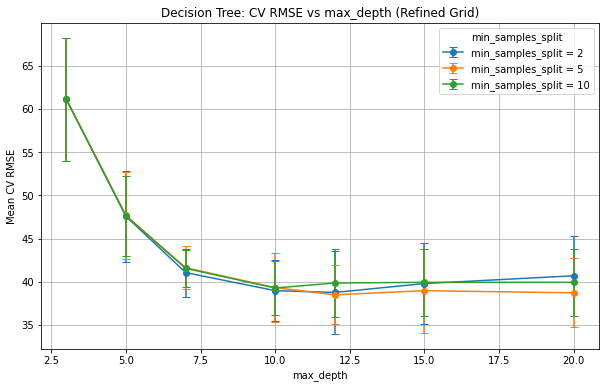

In [59]:
import numpy as np
import matplotlib.pyplot as plt

cv_results = dt_grid_refined.cv_results_


max_depths = dt_param_grid_refined["max_depth"]
min_splits = dt_param_grid_refined["min_samples_split"]

plt.figure(figsize=(10, 6))


for mss in min_splits:
    mean_rmse = []
    std_rmse = []
    
    for depth in max_depths:
        mask = (
            (cv_results["param_max_depth"] == depth) &
            (cv_results["param_min_samples_split"] == mss)
        )
        
        mean_rmse.append(-cv_results["mean_test_score"][mask].item())
        std_rmse.append(cv_results["std_test_score"][mask].item())
    
    plt.errorbar(
        max_depths,
        mean_rmse,
        yerr=std_rmse,
        marker='o',
        capsize=4,
        label=f"min_samples_split = {mss}"
    )

plt.title("Decision Tree: CV RMSE vs max_depth (Refined Grid)")
plt.xlabel("max_depth")
plt.ylabel("Mean CV RMSE")
plt.legend(title="min_samples_split")
plt.grid(True)

plt.savefig("results/dt_refined_rmse_vs_depth.png", dpi=300, bbox_inches="tight")
plt.show()


In [60]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()  #n_neighbors=5, weights='uniform'

knn_cv = cross_validate(
    knn_reg,
    X_scaled,   
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=True
)

knn_train_rmse = -knn_cv["train_rmse"]
knn_test_rmse  = -knn_cv["test_rmse"]
knn_train_mae  = -knn_cv["train_mae"]
knn_test_mae   = -knn_cv["test_mae"]

print("KNN - RMSE (train):", knn_train_rmse.mean(), "+/-", knn_train_rmse.std())
print("KNN - RMSE (test): ", knn_test_rmse.mean(),  "+/-", knn_test_rmse.std())
print("KNN - MAE (train):", knn_train_mae.mean(),  "+/-", knn_train_mae.std())
print("KNN - MAE (test): ", knn_test_mae.mean(),   "+/-", knn_test_mae.std())


KNN - RMSE (train): 34.36285572519163 +/- 0.552086343546826
KNN - RMSE (test):  42.26441668042851 +/- 5.878054926712342
KNN - MAE (train): 26.26510344342197 +/- 0.43069431398239616
KNN - MAE (test):  32.66076819805565 +/- 4.422128200333255


In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_reg = KNeighborsRegressor()

knn_param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9, 11, 15, 20],
    "weights": ["uniform", "distance"]
}


In [62]:
knn_grid = GridSearchCV(
    estimator=knn_reg,
    param_grid=knn_param_grid,
    cv=cv,                   
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    return_train_score=True
)

knn_grid.fit(X_scaled, y)

print("Best KNN params (coarse):", knn_grid.best_params_)
print("Best KNN CV RMSE (coarse):", -knn_grid.best_score_)


Best KNN params (coarse): {'n_neighbors': 5, 'weights': 'distance'}
Best KNN CV RMSE (coarse): 39.300094494508095


In [63]:
knn_best = knn_grid.best_estimator_

knn_best_cv = cross_validate(
    knn_best,
    X_scaled,       # MUST be scaled
    y,
    cv=cv,
    scoring=scoring,        # MUST use dict with rmse + mae
    return_train_score=True
)

knn_best_train_rmse = -knn_best_cv["train_rmse"]
knn_best_test_rmse  = -knn_best_cv["test_rmse"]
knn_best_train_mae  = -knn_best_cv["train_mae"]
knn_best_test_mae   = -knn_best_cv["test_mae"]

print("Tuned KNN - RMSE (train):", knn_best_train_rmse.mean(), "+/-", knn_best_train_rmse.std())
print("Tuned KNN - RMSE (test): ", knn_best_test_rmse.mean(),  "+/-", knn_best_test_rmse.std())
print("Tuned KNN - MAE (train):", knn_best_train_mae.mean(),  "+/-", knn_best_train_mae.std())
print("Tuned KNN - MAE (test): ", knn_best_test_mae.mean(),   "+/-", knn_best_test_mae.std())


Tuned KNN - RMSE (train): 0.0 +/- 0.0
Tuned KNN - RMSE (test):  39.300094494508095 +/- 5.7656690169508416
Tuned KNN - MAE (train): 0.0 +/- 0.0
Tuned KNN - MAE (test):  29.925966366083077 +/- 4.057930869697801


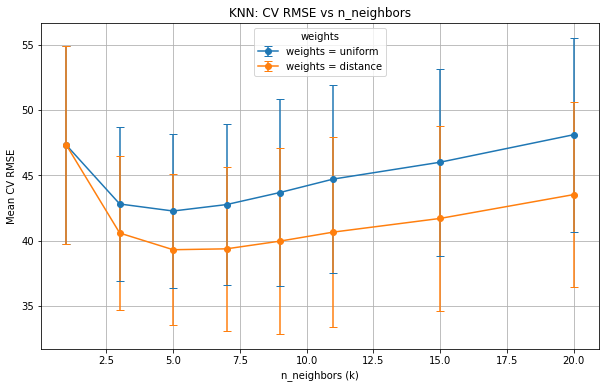

In [64]:
import numpy as np
import matplotlib.pyplot as plt

cv_results_knn = knn_grid.cv_results_

k_values = knn_param_grid["n_neighbors"]
weight_options = knn_param_grid["weights"]

plt.figure(figsize=(10, 6))

for w in weight_options:
    mean_rmse = []
    std_rmse = []
    
    for k in k_values:
        mask = (
            (cv_results_knn["param_n_neighbors"] == k) &
            (cv_results_knn["param_weights"] == w)
        )
        
        mean_rmse.append(-cv_results_knn["mean_test_score"][mask].item())
        std_rmse.append(cv_results_knn["std_test_score"][mask].item())
    
    plt.errorbar(
        k_values,
        mean_rmse,
        yerr=std_rmse,
        marker="o",
        capsize=4,
        label=f"weights = {w}"
    )

plt.title("KNN: CV RMSE vs n_neighbors")
plt.xlabel("n_neighbors (k)")
plt.ylabel("Mean CV RMSE")
plt.legend(title="weights")
plt.grid(True)

plt.savefig("results/knn_rmse_vs_k.png", dpi=300, bbox_inches="tight")
plt.show()
